## Loading the data

In [277]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

load the data from StevensonV2.mat

In [278]:
import scipy.io
mat_dict = scipy.io.loadmat('StevensonV2.mat')

list all the variables.

In [279]:
#todo
mat_dict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Publication', 'timeBase', 'spikes', 'time', 'handVel', 'handPos', 'target', 'startBins', 'targets', 'startBinned'])

extract two variables, spikes(x0) and handVel(y0). 

In [280]:
X0 = mat_dict['spikes'].T
y0 = mat_dict['handVel'][0,:]

find nt and nneuron and print the values.

In [281]:
#TODO
nt=X0.shape[0]
nneuron=X0.shape[1]
print("nt is",nt)
print("nneuron is",nneuron)

nt is 15536
nneuron is 196


extract the time variable.Find the tsamp which is the time between measurements, and ttotal which is the total duration of the recording.

In [282]:
#TODO
time = mat_dict['time']
time=np.reshape(time,nt)
tsamp=((2*sum(time)/nt)-2*time[0])/(nt-1)
ttotal=time[nt-1]-time[0]

## Linear fitting on all the neurons

divide the data into training and test with approximately half the samples in each. Let Xtr and ytr denote the training data and Xts and yts denote the test data.

In [283]:
#TODO
ntr=nt//2
nts=nt-ntr

Xtr=X0[:ntr]
ytr=y0[:ntr]
Xts=X0[ntr:]
yts=y0[ntr:]

trying to fit a simple linear model using all the neurons as predictors.

In [284]:
import sklearn.linear_model
#TODO
regr = sklearn.linear_model.LinearRegression()
regr.fit(Xtr,ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Measure and print the normalized RSS on the test data.

In [285]:
#TODO
ytr_pred = regr.predict(Xtr)
RSS_tr = np.mean((ytr_pred-ytr)**2)/(np.std(ytr)**2)
print("Normalized training RSS=%f" % RSS_tr)
yts_pred = regr.predict(Xts)
RSS_rel_ts = np.mean((yts_pred-yts)**2)/(np.std(yts)**2)
print("Normalized test RSS = {0:f}".format(RSS_rel_ts))

Normalized training RSS=0.468779
Normalized test RSS = 4999054779645876502528.000000


## Linear Fitting with Heuristic Model Selection

Write code which computes the coefficient of determination, $R^2_k$, for each neuron $k$. Plot the $R^2_k$ values.

In [286]:
# TODO
# Rsq = ...
# plt.stem(...)
nsamp, natt = X0.shape
ym = np.mean(y0)
syy = np.mean((y0-ym)**2)
Rsq = np.zeros(natt)
for k in range(natt):
    xm = np.mean(X0[:,k])
    sxy = np.mean((X0[:,k]-xm)*(y0-ym))
    sxx = np.mean((X0[:,k]-xm)**2)
    Rsq[k] = (sxy)**2/sxx/syy
    print("{0:2d} Rsq={1:f}".format(k,Rsq[k]))

 0 Rsq=0.006049
 1 Rsq=0.017449
 2 Rsq=0.017310
 3 Rsq=0.014403
 4 Rsq=0.013202
 5 Rsq=0.000047
 6 Rsq=0.026373
 7 Rsq=0.000008
 8 Rsq=0.000226
 9 Rsq=0.000082
10 Rsq=0.000698
11 Rsq=0.000221
12 Rsq=0.000438
13 Rsq=0.000002
14 Rsq=0.003749
15 Rsq=0.000232
16 Rsq=0.000438
17 Rsq=0.000081
18 Rsq=0.000427
19 Rsq=0.000002
20 Rsq=0.005763
21 Rsq=0.000008
22 Rsq=0.009351
23 Rsq=0.001622
24 Rsq=0.000000
25 Rsq=0.000202
26 Rsq=0.000149
27 Rsq=0.000133
28 Rsq=0.000011
29 Rsq=0.011838
30 Rsq=0.006994
31 Rsq=0.000054
32 Rsq=0.000048
33 Rsq=0.000013
34 Rsq=0.000000
35 Rsq=0.005588
36 Rsq=0.011034
37 Rsq=0.000008
38 Rsq=0.000161
39 Rsq=0.001175
40 Rsq=0.000047
41 Rsq=0.000000
42 Rsq=0.001871
43 Rsq=0.018205
44 Rsq=0.006378
45 Rsq=0.001970
46 Rsq=0.000140
47 Rsq=0.000926
48 Rsq=0.000001
49 Rsq=0.000731
50 Rsq=0.001064
51 Rsq=0.000006
52 Rsq=0.004139
53 Rsq=0.000512
54 Rsq=0.003184
55 Rsq=0.002781
56 Rsq=0.000032
57 Rsq=0.000030
58 Rsq=0.084733
59 Rsq=0.001594
60 Rsq=0.001124
61 Rsq=0.024546
62 Rsq=0

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


find the indices of the d=100 neurons with the highest $R^2_k$ value. Put the d indices into an array Isel. Print the indices of the neurons with the 10 highest correlations.

In [287]:
d = 100  # Number of neurons to use

# TODO
# Isel = ...
# print("The neurons with the ten highest R^2 values = ...)
p=np.argsort(-Rsq)
p_s= p[0:d]
print(p_s)
r=Rsq[p_s]
Isel=r[0:d]
print("The neurons with the ten highest R^2 values")
for i in range(10):
    print(Isel[i])

[192  58 152 153 136  67 120 195  98 193  80 158 145 154   6  61 155 144
 128  43   1   2 182 172 188 126 167   3 100   4 151  29 134  36  84  22
 150 168  66 162 147 183 137 103  30 111 142  44   0  20  35 141 146 114
 117 170 190 166 178 129 176 110  52 125 135  14  87  54 179  55 133 127
 148  68 149  65  79 186  45 189  42  64 109  23  59 115  71  86 187 132
  97  39  83  60  69  50  47 140  73 112]
The neurons with the ten highest R^2 values
0.210845831262
0.0847328603557
0.0761102725882
0.062699356087
0.0622658256534
0.0578485335544
0.0434812082929
0.0419816628654
0.0414122704664
0.0316289265006


Fit a model using only the d neurons selected in the previous step and print both the test RSS per sample and the normalized test RSS.

In [288]:
# TODO
X1=X0[:,p_s]
y1=y0
ntr1=d//2
X1tr=X1[:ntr1]
y1tr=y1[:ntr1]
X1ts=X1[ntr1:]
y1ts=y1[ntr1:]

regr = sklearn.linear_model.LinearRegression()
regr.fit(X1tr,y1tr)
y1_pred = regr.predict(X1ts)
RSS_1 = np.mean((y1_pred-y1ts)**2)/(np.std(y1ts)**2)
RSS1 = np.sum((y1_pred-y1ts)**2)/d
print("RSS per sample =%f" % RSS1)
print("Normalized training RSS=%f" % RSS_1)

RSS per sample =0.488034
Normalized training RSS=1.013499


Create a scatter plot of the predicted vs. actual hand motion on the test data. On the same plot, plot the line where yts_hat = yts.

15486
15486


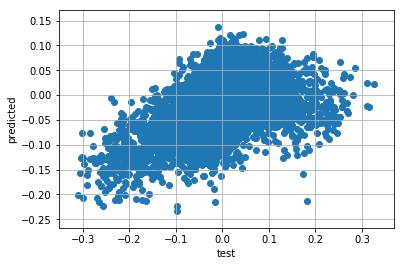

In [289]:
# TODO
yp = regr.predict(X1)
plt.scatter(y1ts,y1_pred)
print(len(y1ts))
print(len(y1_pred))
plt.grid()
plt.xlabel('test')
plt.ylabel('predicted')

## Using K-fold cross validation for the optimal number of neurons

Try model orders with d=10,20,...,190.

In [297]:
# Create a k-fold object
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

# Model orders to be tested
dtest = np.arange(10,200,10)
nd = len(dtest)

# TODO.
for a in range(19):
    d = dtest[a]
    p_s= p[0:d]
    r=Rsq[p_s]
    Isel=r[0:d]
    
    X1=X0[p_s]
    y1=y0
    for tr_in, ts_in in kf.split(X1):
        X2tr=X1[tr_in]
        y2tr=y1[tr_in]
        X2ts=X1[ts_in]
        y2ts=y1[ts_in]
        regr = sklearn.linear_model.LinearRegression()
        regr.fit(X2tr,y2tr)
        y2_pred = regr.predict(X2ts)
        RSS_2 = np.mean((y2_pred-y2ts)**2)/(np.std(y2ts)**2)
        print("Normalized training RSS=%f" % RSS_2)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars


Normalized training RSS=inf
Normalized training RSS=inf
Normalized training RSS=inf
Normalized training RSS=inf
Normalized training RSS=inf
Normalized training RSS=inf
Normalized training RSS=inf
Normalized training RSS=inf
Normalized training RSS=inf
Normalized training RSS=inf
Normalized training RSS=5.297663
Normalized training RSS=4.703609
Normalized training RSS=40.034823
Normalized training RSS=9.785792
Normalized training RSS=66.052454
Normalized training RSS=633.165412
Normalized training RSS=0.428206
Normalized training RSS=2.463364
Normalized training RSS=6.375132
Normalized training RSS=4.052948
Normalized training RSS=2.229517
Normalized training RSS=1.808844
Normalized training RSS=6.098830
Normalized training RSS=1.643017
Normalized training RSS=0.293282
Normalized training RSS=26.333849
Normalized training RSS=1.142385
Normalized training RSS=2.064379
Normalized training RSS=2.004970
Normalized training RSS=2.827520
Normalized training RSS=1.711362
Normalized training RS